In [1]:
# import basic modules 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read data

In [3]:
array_total = pd.read_csv('/content/drive/MyDrive/RPT_SAS/Array'+str(3)+'.csv', index_col = 0)

In [4]:
array_total

,x,y,z,Det-1,Det-2,Det-3,Det-4
0,0.000000,0.107288,0.100000,99892.0,67.0,62.0,0.0
1,0.005025,0.107287,0.100519,62935.0,71.0,47.0,1.0
2,0.010050,0.107284,0.101038,76964.0,66.0,62.0,1.0
3,0.015075,0.107279,0.101556,53398.0,82.0,49.0,1.0
4,0.020101,0.107273,0.102074,60564.0,68.0,59.0,1.0
...,...,...,...,...,...,...,...
10995,0.234773,0.152628,0.061698,289.0,225.0,689.0,1.0
10996,0.504409,0.083876,0.035433,8.0,669.0,8197.0,7.0
10997,0.733244,0.060354,0.038693,1.0,235.0,1266.0,166.0
10998,0.871950,0.121176,0.182642,1.0,733.0,76.0,1368.0


Normalize data

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler =  MinMaxScaler()

In [7]:
array_total.iloc[:,3:] = scaler.fit_transform(array_total.iloc[:,3:])

In [8]:
array_total

,x,y,z,Det-1,Det-2,Det-3,Det-4
0,0.000000,0.107288,0.100000,0.995505,0.000106,0.003807,0.000000
1,0.005025,0.107287,0.100519,0.627199,0.000116,0.002871,0.000010
2,0.010050,0.107284,0.101038,0.767009,0.000104,0.003807,0.000010
3,0.015075,0.107279,0.101556,0.532155,0.000142,0.002996,0.000010
4,0.020101,0.107273,0.102074,0.603570,0.000109,0.003620,0.000010
...,...,...,...,...,...,...,...
10995,0.234773,0.152628,0.061698,0.002880,0.000479,0.042936,0.000010
10996,0.504409,0.083876,0.035433,0.000080,0.001527,0.511483,0.000070
10997,0.733244,0.060354,0.038693,0.000010,0.000503,0.078944,0.001671
10998,0.871950,0.121176,0.182642,0.000010,0.001678,0.004680,0.013770


Split data for training and test

In [9]:
from copy import deepcopy

In [10]:
training = deepcopy(array_total[:10000])
test = deepcopy(array_total[10000:])

In [11]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 6.1 MB/s 


In [12]:
import skopt
from sklearn.neighbors import KNeighborsRegressor
from skopt import BayesSearchCV

In [13]:
model_knn = KNeighborsRegressor()

In [14]:
parameters = {'n_neighbors': list(range(5,100,5)),
              'weights':['uniform', 'distance'],
              'p':[1,2],
              'leaf_size':list(range(10,100,10))}

In [15]:
search = BayesSearchCV(estimator = model_knn, search_spaces=parameters, n_jobs=-1, cv=5)

In [16]:
search.fit(training.iloc[:,3:], training.iloc[:,:3])

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

BayesSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
              search_spaces={'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                             'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                             50, 55, 60, 65, 70, 75, 80, 85, 90,
                                             95],
                             'p': [1, 2], 'weights': ['uniform', 'distance']})

In [17]:
print(search.best_score_)
print(search.best_params_)

-0.060017364980383035
OrderedDict([('leaf_size', 90), ('n_neighbors', 85), ('p', 2), ('weights', 'uniform')])


In [18]:
best_model = search.best_estimator_

In [19]:
preditions = best_model.predict(test.iloc[:,3:])

In [20]:
# define a function to calculate the MEDE averaged
def mede_cal_score(y_test,y_pred):
  med=[]
  for i in range(len(y_pred)):
    med.append(((y_test[i,0]-y_pred[i,0])**2+(y_test[i,1]-y_pred[i,1])**2+(y_test[i,2]-y_pred[i,2])**2)**0.5)
  return sum(med)/len(med)
# function to calculate the MEDE array
def mede_cal_vector(y_test,y_pred):
  med=[]
  for i in range(len(y_pred)):
    med.append(((y_test[i,0]-y_pred[i,0])**2+(y_test[i,1]-y_pred[i,1])**2+(y_test[i,2]-y_pred[i,2])**2)**0.5)
  return med

In [21]:
mede_knn = mede_cal_score(test.iloc[:,:3].to_numpy(), preditions)

In [22]:
mede_knn

0.22612725946167

In [23]:
mede_knn_val = mede_cal_vector(test.iloc[:,:3].to_numpy(), preditions)

In [24]:
def plot_box_3d(x_l, y_l, z_l, axis_p, alpha_val=0.3):
    # face 1
    xl1 = np.linspace(0, x_l, 100, endpoint=True)
    yl1 = np.linspace(0, y_l, 100, endpoint=True)
    Xl1, Yl1 = np.meshgrid(xl1, yl1)
    zl1 = np.full(len(np.ravel(Xl1)), 0)
    Zl1 = zl1.reshape(Xl1.shape)
    # face 2
    xl2 = np.linspace(0, x_l, 100, endpoint=True)
    yl2 = np.linspace(0, y_l, 100, endpoint=True)
    Xl2, Yl2 = np.meshgrid(xl2, yl2)
    zl2 = np.full(len(np.ravel(Xl2)), z_l)
    Zl2 = zl2.reshape(Xl2.shape)
    # face 3
    xl3 = np.linspace(0, x_l, 100, endpoint=True)
    zl3 = np.linspace(0, z_l, 100, endpoint=True)
    Xl3, Zl3 = np.meshgrid(xl3, zl3)
    yl3 = np.full(len(np.ravel(Xl3)), 0)
    Yl3 = yl3.reshape(Xl3.shape)
    # face 4
    xl4 = np.linspace(0, x_l, 100, endpoint=True)
    zl4 = np.linspace(0, z_l, 100, endpoint=True)
    Xl4, Zl4 = np.meshgrid(xl4, zl4)
    yl4 = np.full(len(np.ravel(Xl4)), y_l)
    Yl4 = yl4.reshape(Xl4.shape)
    axis_p.plot_surface(Xl1, Yl1, Zl1, alpha=alpha_val, color='green')
    axis_p.plot_surface(Xl2, Yl2, Zl2, alpha=alpha_val, color='green')
    axis_p.plot_surface(Xl3, Yl3, Zl3, alpha=alpha_val, color='green')
    axis_p.plot_surface(Xl4, Yl4, Zl4, alpha=alpha_val, color='green')

In [25]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'z-axis')

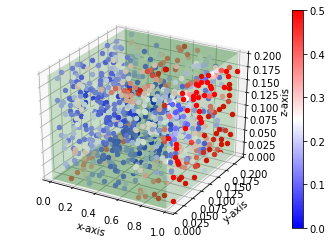

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_box_3d(1,0.2,0.2,axis_p=ax, alpha_val=0.2)
for i in range(1000):
  p=ax.scatter(test.iloc[i,0], test.iloc[i,1], test.iloc[i,2], c=mede_knn_val[i], cmap = 'bwr',vmin=0, vmax=0.5)
cbar=fig.colorbar(p,ax=ax) 
ax.set_ylim(0,0.2)
ax.set_zlim(0,0.2)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

Tunning the ANN

In [27]:
!pip install -q -U keras-tuner
import kerastuner as kt
from tensorflow import keras

     |████████████████████████████████| 135 kB 12.7 MB/s 
     |████████████████████████████████| 1.6 MB 31.9 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [29]:
def model_constructor(hp):
  model = Sequential()
  # layer 1
  hp_units1 = hp.Int("units1", min_value = 5, max_value = 50, step = 5)
  model.add(Dense(units=hp_units1, input_dim=4,activation='relu'))
  model.add(Dropout(0.2))
  # layer 2
  hp_units2 = hp.Int("units2", min_value = 5, max_value = 30, step = 5)
  model.add(Dense(units=hp_units2, activation = 'relu'))
  model.add(Dropout(0.2))
  # layer 3
  hp_units3 = hp.Int("units3", min_value = 5, max_value = 30, step = 5)
  model.add(Dense(units=hp_units3, activation = 'relu'))
  model.add(Dropout(0.2))
  #layer 4
  model.add(Dense(units=3, activation = 'linear'))
  model.compile(loss='mse', metrics='mae', optimizer='adam')
  return model

Uncomment the following cells if you want to run the cells

In [30]:
# tuner = kt.Hyperband(
#     model_constructor,
#     objective = "val_mae",
#     max_epochs = 50,
#     factor = 3,
#     directory = "models/",
#     project_name = "ANN-RPT-lines",
#     overwrite=True
# )

In [31]:
# tuner.search(x=training.iloc[:,3:], y= training.iloc[:,:3], epochs = 50, validation_split = 0.3)
# best_hps = tuner.get_best_hyperparameters(num_trials =1)[0]

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
# check1  = ModelCheckpoint(filepath='array_3_ANN.hdf5', monitor = 'val_loss', save_best_only = True, save_weights_only = False)

In [34]:
# model_ann = tuner.hypermodel.build(best_hps)

In [35]:
# model_ann.summary()

In [36]:
# model_ann.fit(x=training.iloc[:,3:], y= training.iloc[:,:3], epochs = 50, validation_split = 0.3, callbacks = check1)

In [37]:
from tensorflow.keras.models import load_model

In [40]:
model_ann = load_model('/content/drive/MyDrive/RPT_SAS/array_3_ANN.hdf5')

In [41]:
predictions_ann = model_ann.predict(test.iloc[:,3:])

32/32 [==============================] - 2s 2ms/step


In [42]:
mede_ann = mede_cal_score(test.iloc[:,:3].to_numpy(), predictions_ann)

In [43]:
mede_ann

0.21480441807764353

In [44]:
mede_ann_val = mede_cal_vector(test.iloc[:,:3].to_numpy(), predictions_ann)

Text(0.5, 0, 'z-axis')

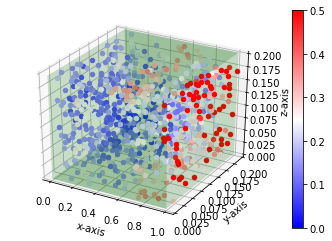

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_box_3d(1,0.2,0.2,axis_p=ax, alpha_val=0.2)
for i in range(1000):
  p=ax.scatter(test.iloc[i,0], test.iloc[i,1], test.iloc[i,2], c=mede_ann_val[i], cmap = 'bwr',vmin=0, vmax=0.5)
cbar=fig.colorbar(p,ax=ax) 
ax.set_ylim(0,0.2)
ax.set_zlim(0,0.2)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')